# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     Juan Alvaro Morales Ramirez Valadez|   |
| **Fecha**      25/08/2025|   |
| **Expediente**745903|   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv("Advertising.csv")

In [12]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
TV = df["TV"].values.reshape([-1, 1])
sales = df["sales"].values.reshape([-1, 1])
radio = df["radio"].values.reshape([-1, 1])
newspaper = df["newspaper"].values.reshape([-1, 1])

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Pues si no hay relacion entre las variables simplemente no valela pena invertir el dinero porque se malgastaria.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Si encontramos con pruebas una relacion entre la publicidad y las ventas pues sinos puede servir el impactoque hay en las ventas porque asi podemos optimizar ese gasto para que se vea refeljado en mejores ventas

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [26]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(TV,sales)
y_pred1 = modelo.predict(TV)

In [27]:
modelo.intercept_

array([7.03259355])

In [28]:
modelo.coef_

array([[0.04753664]])

<function matplotlib.pyplot.show(close=None, block=None)>

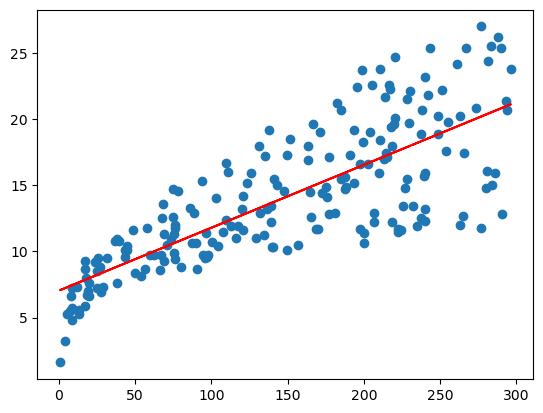

In [29]:
import matplotlib.pyplot as plt

plt.scatter(TV,sales)
plt.plot(TV,y_pred1, color="red")
plt.show

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

Poblacion es todo el conjunto de datos y muestra es solo una parte de la poblacion, es decir, si tienes 100 pares de datos esa sera la poblacion y la muestra puede ser por ejemplo solo utilizando 20 pares de datos

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Yo creo que si usamos la poblacion estamos ntrenando el modelo para que sea exacto y no consider el error o el ruido. Y por eso creo que es mejor trabajar sobre diferentes muestras y despues compararlas; porqeu asi se tomaria en consideracion el ruido de los datos.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [65]:
import numpy as np

n = len(TV)

p = 2

modelo = LinearRegression()
modelo.fit(TV,sales)
y_pred1 = modelo.predict(TV)

beta0 = modelo.intercept_
beta1 = modelo.coef_

x = TV.reshape(-1)
x_bar = np.mean(TV)

Sxx = np.sum((TV - x_bar) ** 2)

RSS = np.sum((sales - y_pred1)**2)
sigma2 = RSS / (n - p)

SE_b1 = np.sqrt(sigma2 / Sxx)
SE_bo = np.sqrt(sigma2 * (1/n + (x_bar**2) / Sxx))

print("SE_beta0", SE_bo)
print("SE_beta1", SE_b1)

SE_beta0 0.4578429402734785
SE_beta1 0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [67]:
inervalo_negativo_beta0 = beta0 - (2*SE_bo)

In [69]:
inervalo_positivo_beta0 = beta0 + (2*SE_bo)

In [71]:
inervalo_negativo_beta1 = beta1 - (2*SE_b1)

In [73]:
inervalo_positivo_beta1= beta1 + (2*SE_b1)

In [75]:
print("Intervalo de confianza B0: ",inervalo_negativo_beta0, ",", inervalo_positivo_beta0) 
print("Intervalo de confianza B1: ",inervalo_negativo_beta1, ",", inervalo_positivo_beta1) 

Intervalo de confianza B0:  [6.11690767] , [7.94827943]
Intervalo de confianza B1:  [[0.04215543]] , [[0.05291785]]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La prueba de hipotesis es para ver si hay algo fuera de lo normal.

La hipotesis nula te dice que todo esta bien.

La hipotesis alternativa te dice que hay algo raro.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [77]:
tB0 = (beta0 - 0) / (SE_bo)

print("tB0=", tB0)

tB0= [15.36027517]


In [79]:
tB1= (beta1 - 0) / (SE_b1)

print("tB1=", tB1)

tB1= [[17.6676256]]


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [81]:
from scipy import stats

In [87]:
p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-p))

p_B0

array([0.])

In [95]:
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-p))

p_B1

array([[0.]])

¿Se rechaza la hipótesis nula? ¿Qué significa?

Nos da un p-value muy pequeño cercano a cero, por lo que se rechaza la hipotesis nula.

Esto significa que tomamos la hipotesis alternativa, osea que si hay alguna relacion entre x e y

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

### NEWSPAPER

In [98]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(newspaper,sales)
y_pred2 = modelo.predict(newspaper)

### B0

In [100]:
modelo.intercept_

array([12.35140707])

### B1

In [102]:
modelo.coef_

array([[0.0546931]])

<function matplotlib.pyplot.show(close=None, block=None)>

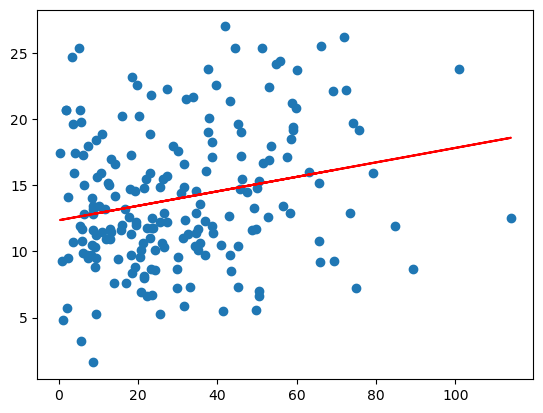

In [104]:
import matplotlib.pyplot as plt

plt.scatter(newspaper,sales)
plt.plot(newspaper,y_pred2, color="red")
plt.show

### SE

In [106]:
import numpy as np

n = len(newspaper)

p = 2

modelo = LinearRegression()
modelo.fit(newspaper,sales)
y_pred2 = modelo.predict(newspaper)

beta0 = modelo.intercept_
beta1 = modelo.coef_

x = newspaper.reshape(-1)
x_bar = np.mean(newspaper)

Sxx = np.sum((newspaper - x_bar) ** 2)

RSS = np.sum((sales - y_pred2)**2)
sigma2 = RSS / (n - p)

SE_b1 = np.sqrt(sigma2 / Sxx)
SE_bo = np.sqrt(sigma2 * (1/n + (x_bar**2) / Sxx))

print("SE_beta0", SE_bo)
print("SE_beta1", SE_b1)

SE_beta0 0.6214201876094345
SE_beta1 0.016575721876358165


### estadistico T

In [108]:
tB0 = (beta0 - 0) / (SE_bo)

print("tB0=", tB0)

tB0= [19.87609562]


In [110]:
tB1= (beta1 - 0) / (SE_b1)

print("tB1=", tB1)

tB1= [[3.29959074]]


### P VALUE

In [112]:
from scipy import stats

p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-p))

p_B0

array([0.])

In [114]:
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-p))

p_B1

array([[0.0011482]])

In [ ]:
Correlación no significa causa

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [130]:
len(TV)

200

In [134]:

import statsmodels.api as sm

TV = df["TV"].values.reshape([-1, 1])
sales = df["sales"].values.reshape([-1, 1])
radio = df["radio"].values.reshape([-1, 1])
newspaper = df["newspaper"].values.reshape([-1, 1])

n = 200

unos = np.ones([n,1])

X = np.hstack([
    unos,
    TV,
    radio,
    newspaper
])

ols = sm.OLS(sales, X) #fit es al reves, es decir, primero Y y luego X

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        17:03:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
import statsmodels.api as sm

TV = df["TV"].values.reshape([-1, 1])
sales = df["sales"].values.reshape([-1, 1])
radio = df["radio"].values.reshape([-1, 1])
newspaper = df["newspaper"].values.reshape([-1, 1])

n = 200

unos = np.ones([n,1])

X = np.hstack([
    unos,
    TV,
    radio,
    TV*radio
])

ols = sm.OLS(sales, X) #fit es al reves, es decir, primero Y y luego X

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          6.68e-146
Time:                        17:36:27   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
x1             0.0191      0.002     12.699      0.000       0.016       0.022
x2             0.0289      0.009      3.241      0.001       0.011       0.046
x3             0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
import statsmodels.api as sm

TV = df["TV"].values.reshape([-1, 1])
sales = df["sales"].values.reshape([-1, 1])
radio = df["radio"].values.reshape([-1, 1])
newspaper = df["newspaper"].values.reshape([-1, 1])

n = 200

unos = np.ones([n,1])

X = np.hstack([
    unos,
    TV,
    radio,
    newspaper,
    TV*radio,
    TV*newspaper,
    radio*newspaper
])

ols = sm.OLS(sales, X) #fit es al reves, es decir, primero Y y luego X

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     993.3
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          3.68e-142
Time:                        17:43:10   Log-Likelihood:                -267.49
No. Observations:                 200   AIC:                             549.0
Df Residuals:                     193   BIC:                             572.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4602      0.318     20.342      0.000       5.834       7.087
x1             0.0203      0.002     12.633      0.000       0.017       0.024
x2             0.0229      0.011      2.009      0.046       0.000       0.045
x3             0.0170      0.010      1.691      0.092      -0.003       0.037
x4             0.0011   5.72e-05     19.930      0.000       0.001       0.001
x5         -7.971e-05   3.58e-05     -2.227      0.027      -0.000   -9.12e-06
x6            -0.0001      0.000     -0.464      0.643      -0.001       0.000
==============================================================================
Omnibus:                      111.385   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.483
Skew:                          -2.046   Prob(JB):                    2.20e-167
Kurtosis:                      11.681   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

Puede ser que si hacemos una regresion simple nos diga que x variable si tiene relacion con y, pero al hacer una regresion multiple nos puede decir que esa variable no tiene peso en el modelo. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*